## Exploratory Data Analysis and Visualization

## Libraries


In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as proportion
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import normaltest
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind, ttest_rel, f_oneway, kstest, shapiro, wilcoxon
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

## Load research dataset

In [2]:

def load_rename_data (filename):
    rename_list = {"Unnamed: 0_level_0Unnamed: 0_level_1":"soundID","Emotionratingmean":"emotionrating",
                    "Emotionmax":"emotion","datetimemax":"datetime","Soundgroupmax":"soundgroup"}
    df = pd.read_csv(filename, header=[0,1])
    df.columns = [''.join(col) for col in df.columns]
    df.rename(columns = rename_list, inplace=True)
    df.drop([0], axis = 0, inplace=True)
    df.dropna(axis=0, inplace=True)
    print("Missing Values\n", df.isnull().sum())
    return df



Instance

In [3]:
df_researchdata = load_rename_data("Extracted data 2/df_combinedined_user001_exp003.csv")
df_researchdata.head()

Missing Values
 soundID                 0
datetime                0
emotionrating           0
emotion                 0
soundgroup              0
heart_ratemean          0
heart_ratestd           0
skin_tempmean           0
skin_tempstd            0
est_02_variationmean    0
est_02_variationstd     0
dtype: int64


,soundID,datetime,emotionrating,emotion,soundgroup,heart_ratemean,heart_ratestd,skin_tempmean,skin_tempstd,est_02_variationmean,est_02_variationstd
1,0085_2,2022-06-15 19:49:53,1.0,Sadness,Transport,102.500000,0.707107,1.539936,0.000000,0.0,0.0
5,0149_2,2022-06-15 19:27:09,4.0,Fear,Nature,81.000000,1.414214,1.614936,0.007071,0.0,0.0
7,0166_2,2022-06-15 19:45:41,1.0,Sadness,Transport,95.666667,2.081666,1.524936,0.000000,24.0,0.0
8,0167_2,2022-06-15 19:49:29,3.0,Fear,Transport,98.500000,0.707107,1.539936,0.000000,0.0,0.0
9,0173_2,2022-06-15 19:54:58,4.0,Sadness,Transport,96.333333,2.081666,1.464936,0.000000,-8.0,0.0


##  Dataframe Overview and Grouping

In [62]:

def explore_split_data (df):
    # print("This is the whole dataset summary")
    # print(df.describe())

    #divide the data frame into 3 based on emotion experienced
    df_fear  = df[(df.emotion == "Fear")]
    df_sadness = df[(df.emotion == "Sadness")]
    df_happiness = df[(df.emotion == "Happiness")]

    # print("This is the fear dataframe summary")
    # print(df_fear.describe())
    # print("This is the sad dataframe summary")
    # print(df_sadness.describe())
    # print("This is the happy dataframe summary")
    # print(df_happiness.describe())

    #divide the dataframe into four based on sound stimuli

    df_animal = df[df.soundgroup == "Animal"]
    df_nature = df[(df.soundgroup == "Nature")]
    df_transport = df[(df.soundgroup == "Transport")]
    df_people = df[(df.soundgroup == "People")]

    # print("This is the animal dataframe summary")
    # print (df_animal.describe())
    # print("This is the nature dataframe summary")
    # print (df_nature.describe())
    # print("This is the transport dataframe summary")
    # print (df_transport.describe())
    # print("This is the people dataframe summary")
    # print (df_people.describe())

    return df_fear, df_sadness, df_happiness, df_animal, df_nature, df_transport, df_people

def create_dflist_name (dfs):
		data_frames = explore_split_data(dfs)
		df_list = [df for df in data_frames]
		df_namelist = []
		for df in df_list:
			if (df.emotion.values == "Fear").all(): 
				df_namelist.append("fear")
			elif(df.emotion.values=="Sadness").all(): 
				df_namelist.append("sadness")
			elif(df.emotion.values=="Happiness").all():
				df_namelist.append("happiness")
			elif (df.soundgroup.values=="Animal").all(): 
				df_namelist.append("animal")
			elif (df.soundgroup.values=="Nature").all(): 
				df_namelist.append("nature")
			elif (df.soundgroup.values=="People").all(): 
				df_namelist.append("people")
			else:
				df_namelist.append('transport')
		return df_list, df_namelist

def create_emotion_df(df):
    df_fear  = df[(df.emotion == "Fear")]
    df_sadness = df[(df.emotion == "Sadness")]
    df_happiness = df[(df.emotion == "Happiness")]
    return df_fear,df_sadness,df_happiness

def create_soundgrp_df(df):
    df_animal = df[df.soundgroup == "Animal"]
    df_nature = df[(df.soundgroup == "Nature")]
    df_transport = df[(df.soundgroup == "Transport")]
    df_people = df[(df.soundgroup == "People")]
    return df_animal, df_nature,df_transport,df_people



Instance

In [20]:
explore_split_data(df_researchdata)

(    soundID             datetime  emotionrating emotion soundgroup  \
 5    0149_2  2022-06-15 19:27:09            4.0    Fear     Nature   
 8    0167_2  2022-06-15 19:49:29            3.0    Fear  Transport   
 17   0217_2  2022-06-15 19:57:12            7.0    Fear  Transport   
 20   0222_2  2022-06-15 19:45:28            2.0    Fear  Transport   
 36   0283_2  2022-06-15 19:43:50            2.0    Fear  Transport   
 38   0286_2  2022-06-15 19:48:35            4.0    Fear  Transport   
 42   0290_2  2022-06-15 19:55:10            3.0    Fear  Transport   
 44   0296_2  2022-06-15 19:27:54            5.0    Fear     Nature   
 48   0300_2  2022-06-15 19:43:25            2.0    Fear  Transport   
 49   0308_2  2022-06-15 19:55:22            4.0    Fear  Transport   
 50   0311_2  2022-06-15 19:37:05            1.0    Fear     People   
 52   0322_2  2022-06-15 19:42:26            4.0    Fear  Transport   
 60   0337_2  2022-06-15 19:30:20            6.0    Fear     Nature   
 69   

## Visualizing Descriptive Statistics

In [27]:

def visualize_boxplot(dfs):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,10))
    sns.boxplot(ax=axes[0], data=dfs, x='emotion', y='heart_ratemean')
    sns.boxplot(ax=axes[1], data=dfs, x='soundgroup', y='heart_ratemean')
    plt.show()


def visualize_boxplot_group(dfs):
    '''
    This is to visualize boxplot amongst participants
    '''
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    sns.boxplot(ax=axes[0, 0], data=dfs, x='emotion', y='petal_width')
    sns.boxplot(ax=axes[0, 1], data=dfs, x='emotion', y='petal_length')
    sns.boxplot(ax=axes[0, 2], data=dfs, x='emotion', y='sepal_width')
    sns.boxplot(ax=axes[1, 0], data=dfs, x='emotion', y='sepal_length')
    sns.boxplot(ax=axes[1, 1], data=dfs, x='emotion', y='petal_width')
    sns.boxplot(ax=axes[1, 2], data=dfs, x='emotion', y='petal_length')
    plt.show()

# def get_df_name(df):
#     name =[x for x in globals() if globals()[x] is df][0]
#     return name

def visualize_histplot(dfs):
    dfs,names = create_dflist_name(dfs)
    for df,name in zip(dfs,names):
        #need to pull title for all plots
        sns.histplot(data=df, x="heart_ratemean", kde=True )
        plt.title(f'{name}')
        plt.show()
    # return df_list 

def visualize_qqplot(dfs):
    dfs,names = create_dflist_name(dfs)
    for df,name in zip(dfs,names):
        qqplot(df.heart_ratemean, line= "s")
        plt.title(f'{name}')
        plt.show()    

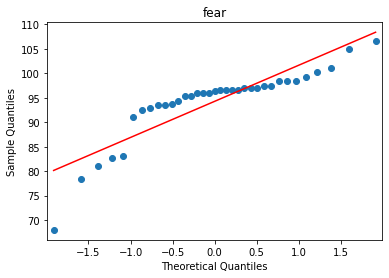

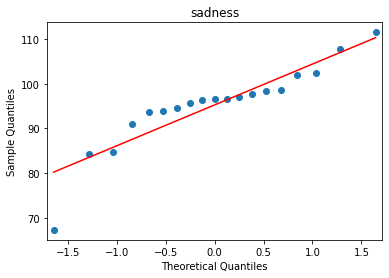

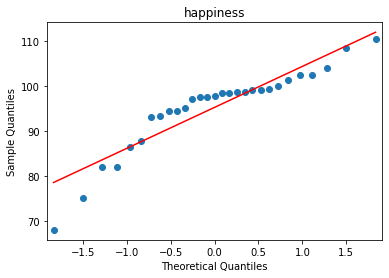

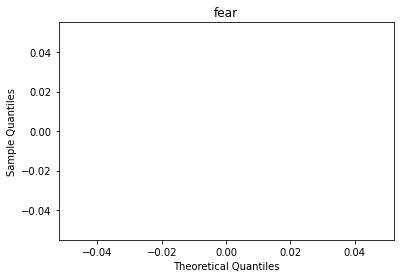

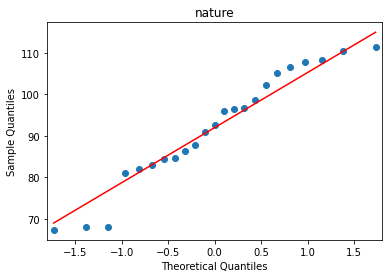

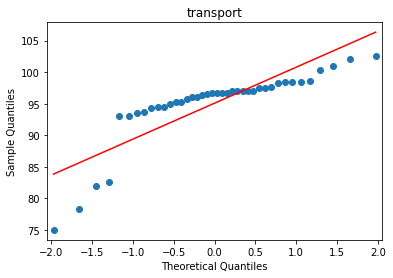

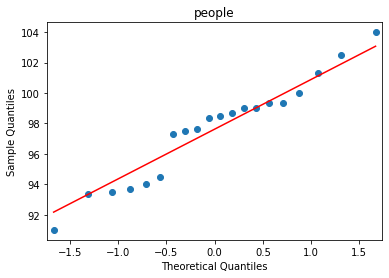

In [29]:
visualize_qqplot(df_researchdata)

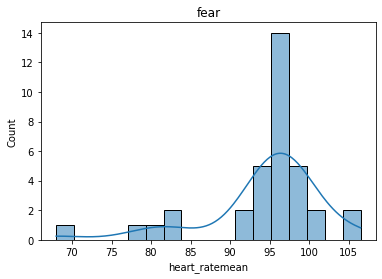

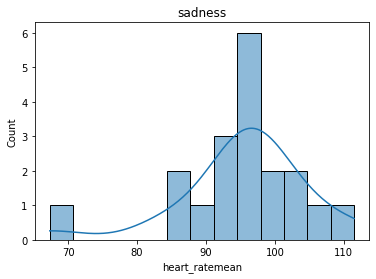

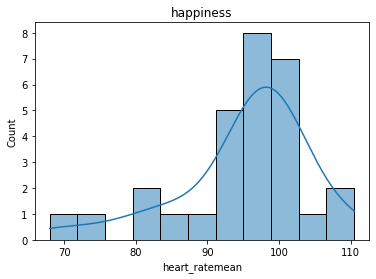

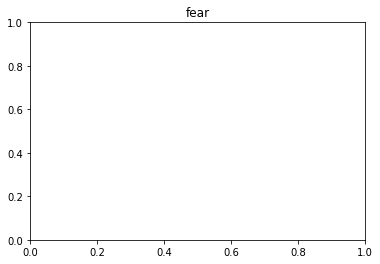

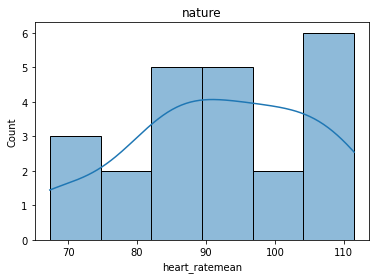

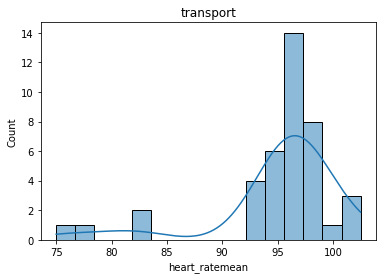

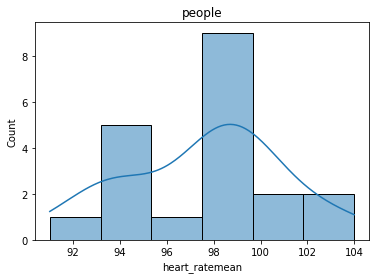

In [24]:
visualize_histplot(df_researchdata)

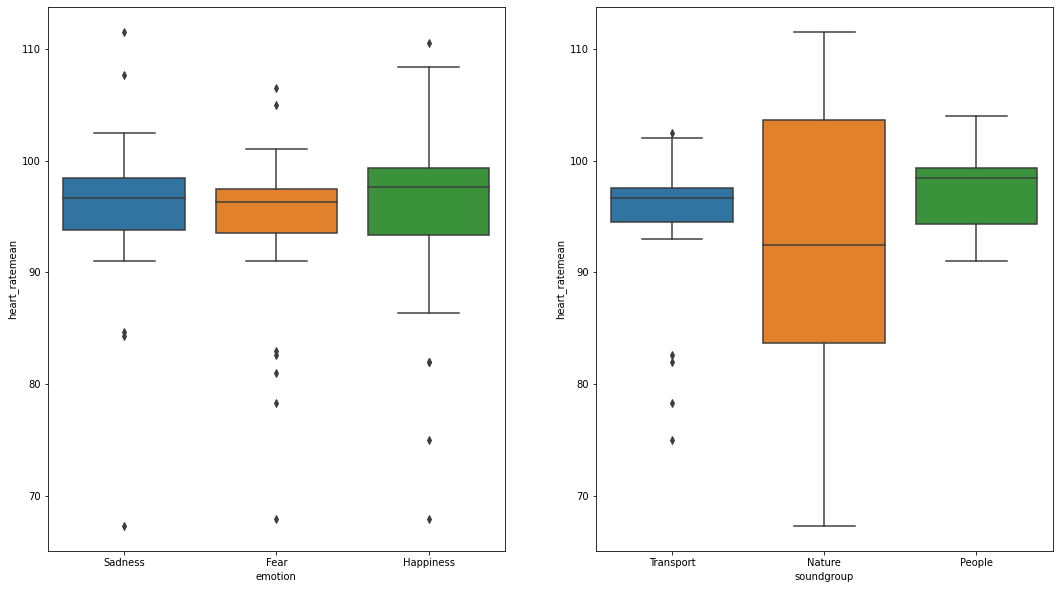

In [60]:
visualize_boxplot(df_researchdata)

## Normality Tests

In [40]:
def shapiro_test (dfs):
	
	dfs,names = create_dflist_name(dfs)
	for df,name in zip(dfs,names):
		stat, p = shapiro(df.heart_ratemean)
		print('Statistics=%.3f, p=%.3f' % (stat, p))
		# interpret
		alpha = 0.05
		if p > alpha:
			print(f'\n{name}\n', 'Sample looks Gaussian (fail to reject H0)')
		else:
			print(f'\n{name}\n', 'Sample does not look Gaussian (reject H0)')

In [18]:
x  = create_dict(df_researchdata)

['fear', 'sadness', 'happiness', 'fear', 'nature', 'transport', 'people']


In [41]:
shapiro_test(df_researchdata)

Statistics=0.811, p=0.000

fear
 Sample does not look Gaussian (reject H0)
Statistics=0.880, p=0.022

sadness
 Sample does not look Gaussian (reject H0)
Statistics=0.884, p=0.004

happiness
 Sample does not look Gaussian (reject H0)


ValueError: Data must be at least length 3.

In [ ]:
# result = anderson(df.heart_ratemean)
# print('Statistic: %.3f' % result.statistic)
# p = 0
# for i in range(len(result.critical_values)):
# 	sl, cv = result.significance_level[i], result.critical_values[i]
# 	if result.statistic < result.critical_values[i]:
# 		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
# 	else:
# 		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [44]:
def normal_test(dfs):
	dfs,names = create_dflist_name(dfs)
	for df,name in zip(dfs,names):
		stat, p = normaltest(df.heart_ratemean)
		print('stat=%.3f, p=%.3f' % (stat, p))
		if p > 0.05:
			print(f'\n{name}\n','Probably Gaussian')
		else:
			print(f'\n{name}\n','Probably not Gaussian')

### Hypothesis 

Ho: There are no significant differences in heart rate of the three emotion/groups


H1: There are significant differences in heart rate of the three emotions/groups for user one

## Parametric Tests

### 2 sample independent t-test

In [51]:
#Defining 2-sample independent t-test 
def two_sample_ind_t_test(data1, data2, tail = "two",  alpha = 0.05):    
    x_bar1 = np.mean(data1)
    x_bar2 = np.mean(data2)
    st1 = np.std(data1)
    st2 = np.std(data2)
    n1 = len(data1)
    n2 = len(data2)
    df = n1 + n2 - 2
    
    variance_ratio = max(st1**2, st2**2)/min(st1**2,st2**2)
    if variance_ratio < 4:
        equal_var = True
    else:
        equal_var = False
    
    t_score, pi_value = ttest_ind(data1, data2, equal_var = equal_var)

#     t-score = (x1 — x2) / √ (σ1^2/n1 + σ2^2/n2),
#     where x1 and x2 are mean of sample and σs are the standard deviations of 1 and sample 2 respectively.
#     Python package takes n-1 instead of n.2

    my_t_score = (x_bar1 - x_bar2)/ np.sqrt( st1**2/(n1-1)+ st2**2/(n2-1))
    my_pi_value = st.t.cdf(min(-my_t_score, my_t_score), df) * 2
    
    if np.round(t_score, 5) != np.round(my_t_score,5) or np.round(pi_value,5) != np.round(my_pi_value,5):
        if equal_var == True:
            print("T-score or p-value calculation Error...")
    
    if tail == 'one':
        if x_bar1 > x_bar2:
            H0 = 'A mean <= B mean'
            H1 = 'A mean > B mean'
        else:
            H0 = 'A mean >= B mean'
            H1 = 'A mean < B mean'
            
        pi_value = pi_value/2
        

    elif tail == 'two':
        H0 = 'A mean = B mean'
        H1 = 'A mean != B mean'
    
    #Note that to find a two-tailed test p-value we simply multiply the p-value of the one-tailed p-value by two.
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(f"""
    Group 1 mean: {np.round(x_bar1,2)}
    Group 2 mean: {np.round(x_bar2,2)}
    t-score: {np.round(t_score,5)}    
    p_value: {pi_value}    
       
    """)    
        
    if pi_value < alpha:
        print(f"Rejecting null hyphotheses: {H1}")
    else:
        print(f"Not enough evidence to reject Null Hyphothesis: {H0}")

 Heart rate check - Emotion Category

In [60]:
df_fear,df_sadness,df_happiness = create_emotion_df(df_researchdata)

print('Sadness vs Fear')
sadvsfear = two_sample_ind_t_test(df_sadness.heart_ratemean, df_fear.heart_ratemean, 
                                        tail="two", alpha=0.05)

print('Sadness vs Happiness')
sadvshappy = two_sample_ind_t_test(df_sadness.heart_ratemean, df_happiness.heart_ratemean, 
                                        tail="two", alpha=0.05)

print('Fear vs Happiness')
fearvshappy = two_sample_ind_t_test(df_happiness.heart_ratemean, df_fear.heart_ratemean, 
                                        tail="two", alpha=0.05)

Sadness vs Fear
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 95.26
    Group 2 mean: 94.27
    t-score: 0.42702    
    p_value: 0.6711306662323016    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean
Sadness vs Happiness
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 95.26
    Group 2 mean: 95.23
    t-score: 0.01211    
    p_value: 0.9903893569392399    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean
Fear vs Happiness
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 95.23
    Group 2 mean: 94.27
    t-score: 0.46034    
    p_value: 0.6468831170398313    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean


Skin temperature check - Emotion Category

In [61]:
df_fear,df_sadness,df_happiness = create_emotion_df(df_researchdata)

print('Sadness vs Fear')
sadvsfear = two_sample_ind_t_test(df_sadness.skin_tempmean, df_fear.skin_tempmean, 
                                        tail="two", alpha=0.05)

print('Sadness vs Happiness')
sadvshappy = two_sample_ind_t_test(df_sadness.skin_tempmean, df_happiness.skin_tempmean, 
                                        tail="two", alpha=0.05)

print('Fear vs Happiness')
fearvshappy = two_sample_ind_t_test(df_happiness.skin_tempmean, df_fear.skin_tempmean, 
                                        tail="two", alpha=0.05)

Sadness vs Fear
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 1.57
    Group 2 mean: 1.56
    t-score: 1.02742    
    p_value: 0.30897904751665395    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean
Sadness vs Happiness
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 1.57
    Group 2 mean: 1.57
    t-score: 0.24547    
    p_value: 0.8071816532958339    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean
Fear vs Happiness
T-score or p-value calculation Error...
H0 : A mean = B mean
H1 : A mean != B mean


    Group 1 mean: 1.57
    Group 2 mean: 1.56
    t-score: 0.89236    
    p_value: 0.3756512465066364    
       
    
Not enough evidence to reject Null Hyphothesis: A mean = B mean


 Heart rate check - Sound group category

In [ ]:
df_animal, df_nature,df_transport,df_people = create_soundgrp_df(df_researchdata)

print('animal vs nature')
sadvsfear = two_sample_ind_t_test(df_sadness.heart_ratemean, df_fear.heart_ratemean, 
                                        tail="two", alpha=0.05)

print('Sadness vs Happiness')
sadvshappy = two_sample_ind_t_test(df_sadness.heart_ratemean, df_happiness.heart_ratemean, 
                                        tail="two", alpha=0.05)

print('Fear vs Happiness')
fearvshappy = two_sample_ind_t_test(df_happiness.heart_ratemean, df_fear.heart_ratemean, 
                                        tail="two", alpha=0.05)

Skin temp check - Sound group category

### ANOVA

In [63]:
def anova(*args, alpha = 0.05):
    H0 = 'There is no significant difference between the groups'
    H1 = 'There is a significant difference between the groups'
    
    F, pi_value = st.f_oneway(*args)
    print(f"H0 : {H0}")
    print(f"H1 : {H1}\n")
    
    print(
    f"""
    F-score: {(np.round(F,5))}    
    p_value: {pi_value}""")  
    
    n = 0
    for g in range(len(args)):
        n+= len(args[g])
        print(
    f"""    Group{g} mean : {np.round(np.mean(args[g]),2)}""")
        
    #pi_value_calc
#     k = len(args)
#     my_pi_value = 1 - st.f.cdf(F,  k-1, n-k)
    
    if pi_value < alpha:
        print(f"\nRejecting null hyphotheses: {H1}")
    else:
        print(f"\nNot enough evidence to reject Null Hyphothesis: {H0}")

Heartrate Check - Emotion Category

In [67]:
df_fear,df_sadness,df_happiness = create_emotion_df(df_researchdata)
anova(df_fear.heart_ratemean,df_sadness.heart_ratemean,df_happiness.heart_ratemean)   


H0 : There is no significant difference between the groups
H1 : There is a significant difference between the groups


    F-score: 0.13116    
    p_value: 0.8772687372852738
    Group0 mean : 94.27
    Group1 mean : 95.26
    Group2 mean : 95.23

Not enough evidence to reject Null Hyphothesis: There is no significant difference between the groups


Skin Temperature Check - Emotion Category

In [68]:
df_animal, df_nature,df_transport,df_people = create_soundgrp_df(df_researchdata)
anova(df_animal.heart_ratemean,df_nature.heart_ratemean,df_transport.heart_ratemean,df_people.heart_ratemean)   

H0 : There is no significant difference between the groups
H1 : There is a significant difference between the groups


    F-score: nan    
    p_value: nan
    Group0 mean : nan
    Group1 mean : 91.96
    Group2 mean : 95.08
    Group3 mean : 97.62

Not enough evidence to reject Null Hyphothesis: There is no significant difference between the groups


/Users/olumide/Documents/Dissertation/Sound Stimuli version 1/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


## Non-Parametric Tests

### Mann Whitney Test

In [69]:
def mann_whiteneyu(data1, data2):
	stat, p = mannwhitneyu(data1, data2)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Same distribution (fail to reject H0)')
	else:
		print('Different distribution (reject H0)')

In [71]:
df_fear,df_sadness,df_happiness = create_emotion_df(df_researchdata)

print('Sadness vs Fear')
sadvsfear = mann_whiteneyu(df_sadness.heart_ratemean, df_fear.heart_ratemean)

print('Sadness vs Happiness')
sadvshappy = mann_whiteneyu(df_sadness.heart_ratemean, df_happiness.heart_ratemean)

print('Fear vs Happiness')
fearvshappy = mann_whiteneyu(df_happiness.heart_ratemean, df_fear.heart_ratemean)

Sadness vs Fear
Statistics=364.500, p=0.568
Same distribution (fail to reject H0)
Sadness vs Happiness
Statistics=245.500, p=0.534
Same distribution (fail to reject H0)
Fear vs Happiness
Statistics=614.000, p=0.153
Same distribution (fail to reject H0)


### Wilcoxon test

In [73]:
def wilcoxon_test(data1,data2):
	stat, p = wilcoxon(data1,data2)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Same distribution (fail to reject H0)')
	else:
		print('Different distribution (reject H0)')

In [74]:
df_fear,df_sadness,df_happiness = create_emotion_df(df_researchdata)

print('Sadness vs Fear')
sadvsfear = wilcoxon_test(df_sadness.heart_ratemean, df_fear.heart_ratemean)

print('Sadness vs Happiness')
sadvshappy = wilcoxon_test(df_sadness.heart_ratemean, df_happiness.heart_ratemean)

print('Fear vs Happiness')
fearvshappy = wilcoxon_test(df_happiness.heart_ratemean, df_fear.heart_ratemean)

Sadness vs Fear


ValueError: The samples x and y must have the same length.